### Intro
Analyze data from an online lung cancer prediction system
### Questions
What are the age distributions of the patients? <br>
What percentage of the patients have lung cancer? <br>
What are the correlation between each symptom? <br>
What are the most common symptom for someone with lung cancer? <br>
What are the most common symptom for each gender with lung cancer? <br>

<a href="https://www.kaggle.com/mysarahmadbhat/lung-cancer">Source</a>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Import data and review
df = pd.read_csv(r'C:\Users\Chunna\Documents\Data_Analyst_Portfolio\survey_lung_cancer.csv', low_memory=False)
df.columns = df.columns.str.strip() # Remove trailing spaces in columns
df.columns = df.columns.str.replace(' ','_')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
# Check for Nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC_DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL_CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS_OF_BREATH    309 non-null    int64 
 13  SWALLOWING_DIFFICULTY  309 non-null    int64 
 14  CHEST_PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [4]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


## What are the age distributions of the patients?
Higest age distribution among 51-70 year olds

In [5]:
# Add age distribution column
def AD(row):
    if row['AGE'] >= 21 and row['AGE'] <= 30:
        val = '21-30'
    elif row['AGE'] >= 31 and row['AGE'] <= 40:
        val = '31-40'
    elif row['AGE'] >= 41 and row['AGE'] <= 50:
        val = '41-50'
    elif row['AGE'] >= 51 and row['AGE'] <= 60:
        val = '51-60'
    elif row['AGE'] >= 61 and row['AGE'] <= 70:
        val = '61-70'
    elif row['AGE'] >= 71 and row['AGE'] <= 80:
        val = '71-80'
    elif row['AGE'] >= 81 and row['AGE'] <= 90:
        val = '81+'
    return val

df['AGE_DISTRIBUTION'] = df.apply(AD, axis=1)

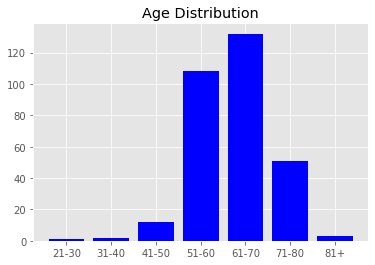

In [97]:
count_age = df['AGE_DISTRIBUTION'].value_counts().reset_index().sort_values(['index'],ascending=True)
labels = count_age.iloc[:,0].to_numpy()
values = count_age.iloc[:,1].to_numpy()

plt.style.use('ggplot')
x = [i for i, _ in enumerate(labels)]
plt.bar(labels,values,color='blue')
plt.xticks(x,labels)
plt.title('Age Distribution')

plt.show()

## What percentage of the patients have lung cancer?
87% of the patients have lung cancer

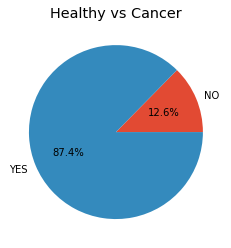

In [7]:
lung_cancer_count = df.groupby('LUNG_CANCER').size().reset_index(name='count')
lung_cancer_count.set_index('LUNG_CANCER').plot.pie(y='count',autopct='%1.1f%%', ylabel='', legend=False, title='Healthy vs Cancer');

## What are the correlation between each symptom?
Correlation ranking: <br>
High correlation between yellow fingers & anxiety <br>
High corrleation between swallowing difficulty & anxiety <br>
High correlation between shortness of breath & fatigue <br>

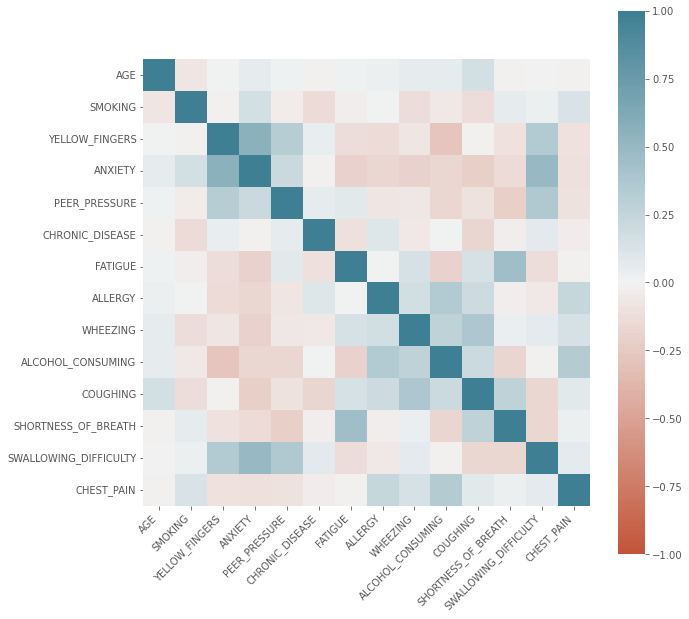

In [8]:
corr = df.corr()

plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## What are the most common symptom for someone with lung cancer?
1) Fatiguee <br>
2) Shortness of Breathe <br>
3) Coughing <br>

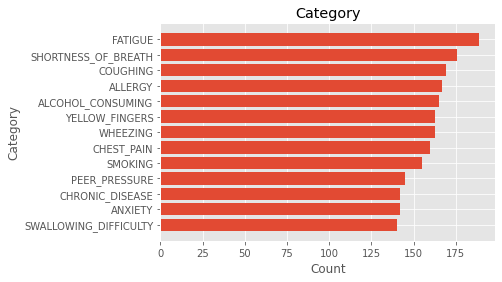

In [9]:
cancer = df[df['LUNG_CANCER']=='YES']

cancer_category = cancer[cancer.columns.difference(['GENDER','AGE','LUNG_CANCER','AGE_DISTRIBUTION'])]
#test = cancer[cancer['SMOKING']==2].shape[0]
values=[]

# Loop through number of rows for each category equals 2
for val in cancer_category:
    values.append(int(cancer_category[cancer_category[val]==2].shape[0]))

# Append columns to a list
labels = cancer_category.columns.values.tolist()

category = {'category':labels,'count':values}
category = pd.DataFrame(category).sort_values(['count'],ascending=True)

labels_edit = category.iloc[:,0].to_numpy()
values = category.iloc[:,1].to_numpy()


plt.barh(labels_edit,values)
plt.title('Category')
plt.ylabel('Category')
plt.xlabel('Count')
plt.show()


## What are the most common symptom for each gender with lung cancer?
Females: peer pressure, yelllow fingers, and anxiety <br>
Males: alcohol consuming, chest pain, and allergy

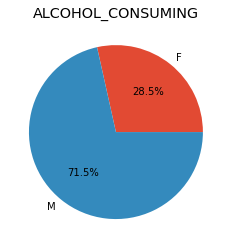

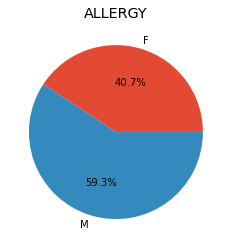

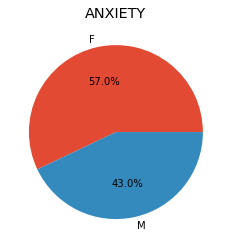

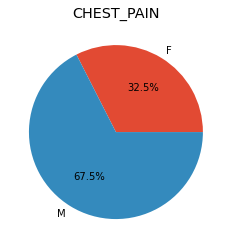

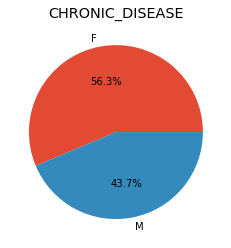

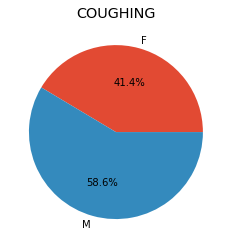

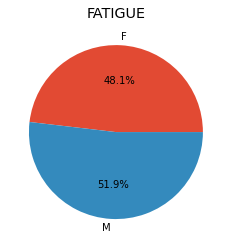

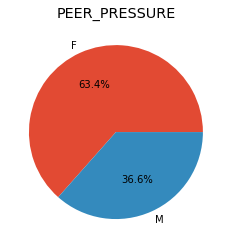

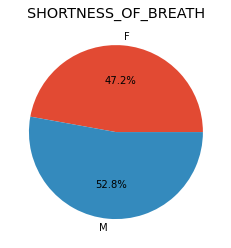

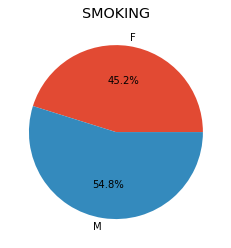

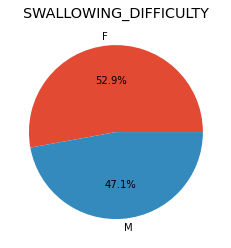

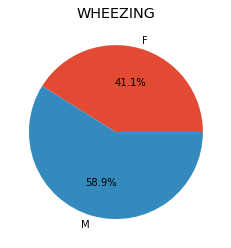

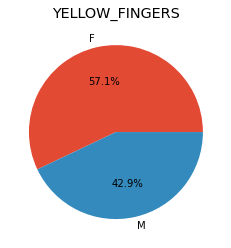

In [10]:
# Gender Analysis: Category for patients with lung cancer (visualization)

for i in cancer[labels].columns:
     x = cancer[cancer[i]==2].groupby(['GENDER']).size().reset_index(name='count')   
     x.set_index('GENDER').plot.pie(y='count',legend=False, autopct='%1.1f%%', ylabel='', title=i)  
     plt.show()

In [96]:
# Gender Analysis: Category for patients with lung cancer (table)

gender_analysis_list = []
for i in cancer[labels].columns:
    gender_analysis = cancer[cancer[i]==2].groupby(['GENDER']).size().to_frame(i)
    gender_analysis[i] = gender_analysis[i]/gender_analysis[i].sum() # % calc
    gender_analysis_pivot = pd.pivot_table(gender_analysis, columns=['GENDER'], aggfunc=sum)
    gender_analysis_pivot = gender_analysis_pivot.rename_axis(None, axis=1).rename_axis('Category', axis=0) # Rename index
    gender_analysis_list.append(gender_analysis_pivot.iloc[0]) #Append each row from for loop into the empty list
gender_analysis_df = pd.DataFrame(gender_analysis_list)
gender_analysis_df = gender_analysis_df.sort_values('F', ascending=False)
gender_analysis_df= gender_analysis_df.style.format({'F': '{:.0%}', 'M': '{:.0%}'}) # format to percentage
gender_analysis_df

,F,M
PEER_PRESSURE,63%,37%
YELLOW_FINGERS,57%,43%
ANXIETY,57%,43%
CHRONIC_DISEASE,56%,44%
SWALLOWING_DIFFICULTY,53%,47%
FATIGUE,48%,52%
SHORTNESS_OF_BREATH,47%,53%
SMOKING,45%,55%
COUGHING,41%,59%
WHEEZING,41%,59%
